In [29]:
import billboard
import pandas as pd
import numpy
import matplotlib.pyplot as plt
import collections

In [30]:
all_charts = {}

for i in range(0, 42):
  year = str(i + 1973)
  path = "./charts/" + year + "_Charts.csv"
  df = pd.read_csv(path)
  all_charts[year] = df

charts_over_time = collections.OrderedDict(sorted(all_charts.items()))


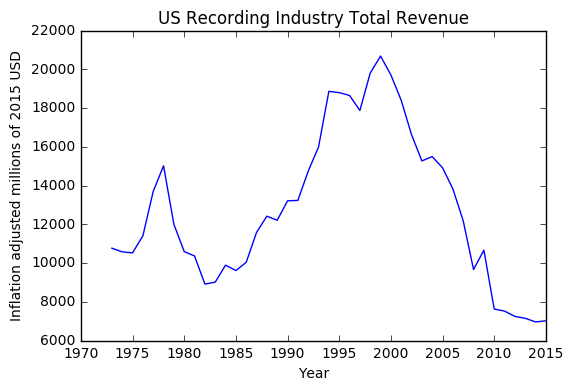

In [31]:
rev = pd.read_csv("US_Rev_by_Format.csv", index_col=0)
#Need to Take out $ from CSV
plt.plot(rev.ix["TOTAL"])
plt.title("US Recording Industry Total Revenue")
plt.xlabel("Year")
plt.ylabel('Inflation adjusted millions of 2015 USD')
plt.savefig("./Plots/US_REV.png")
plt.show()

In [32]:
# GET NUMBER OF UNIQUE SONGS BY YEAR 

yr = 1973
yrs = []
unique_songs = []

for year in charts_over_time: 
  #create years list
  yrs.append(yr) 
  df = charts_over_time[year]
  unique_songs.append(len(df.columns))
  yr +=1 


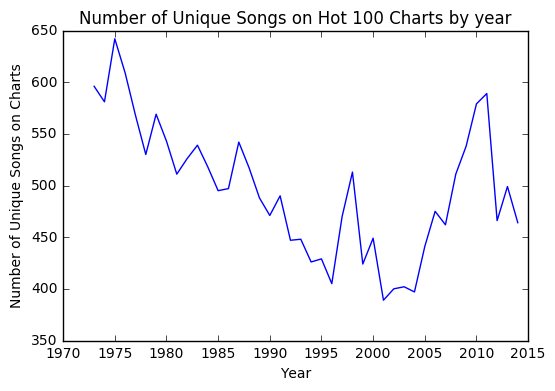

In [55]:
#PLOT NUMBER OF UNIQUE SONGS BY YEAR

plt.plot(yrs, unique_songs)
plt.title("Number of Unique Songs on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Number of Unique Songs on Charts')
plt.savefig("./Plots/Unique_Song1.png")
plt.show()


In [34]:
avgs = []

for year in charts_over_time: 
  df = charts_over_time[year]

  names = list(df.columns.values)
  sum = 0 
  for song in names: 
    sum += df[song].sum()

  avg = sum/len(names)
  avgs.append(avg)

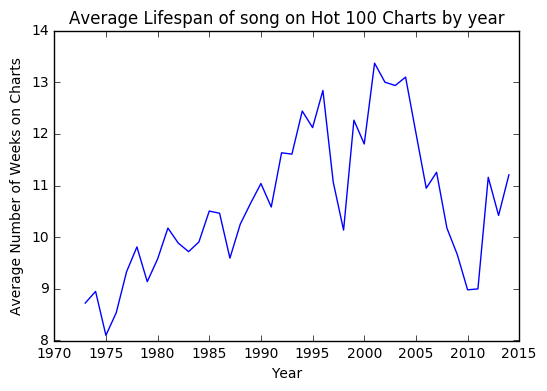

In [38]:
plt.plot(yrs, avgs)
plt.title("Average Lifespan of song on Hot 100 Charts by year")
plt.xlabel("Year")
plt.ylabel('Average Number of Weeks on Charts')
#plt.savefig("./Plots/Avg_Weeks1.png")
plt.show()

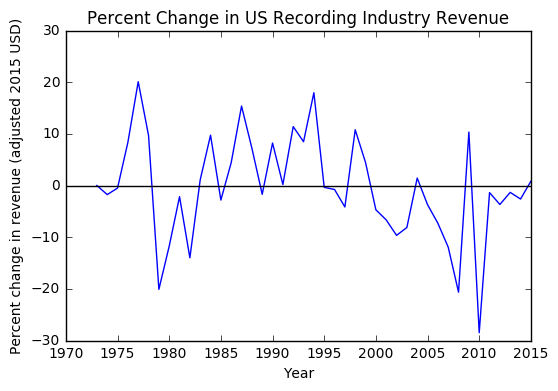

In [56]:
rev_pct_change = rev.ix["TOTAL"].pct_change()*100
rev_pct_change[0] = 0
rev_pct_change
plt.plot(rev_pct_change)
plt.title("Percent Change in US Recording Industry Revenue")
plt.xlabel("Year")
plt.ylabel('Percent change in revenue (adjusted 2015 USD)')
plt.axhline(y=0, xmin=0, xmax=1000, linewidth=1, color = 'k')

plt.savefig("./Plots/pct_change_rev1.png")
plt.show()
